In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')
from composition_stats import closure
from sklearn import linear_model

In [ ]:
import os 
  
# current directory 
current_dir = os.getcwd() 
relative_path=os.path.abspath(os.path.join(current_dir, os.pardir))

In [380]:
SLR = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\SLR2_data.csv",index_col=[0]))

In [381]:
att = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\attributes.csv",index_col=[0]))

In [382]:
test_att=att[att.index>'2009-01-01']
train_att=att[att.index<'2010-01-01']

In [383]:
SLR_1=SLR['log_ratio_1'] 
SLR_2=SLR['log_ratio_2'] 
SLR_1=pd.DataFrame(SLR_1)
SLR_2=pd.DataFrame(SLR_2)


In [384]:
full1=pd.concat([train_att,SLR_1],axis=1)
full1=full1.dropna()
full2=pd.concat([train_att,SLR_2],axis=1)
full2=full2.dropna()

In [385]:
X_train1 =full1[full1.columns.difference(['log_ratio_1'])]
y_train1 = full1.iloc[:,3:4]

X_train2 =full2[full2.columns.difference(['log_ratio_2'])]
y_train2 = full2.iloc[:,3:4]

<AxesSubplot:>

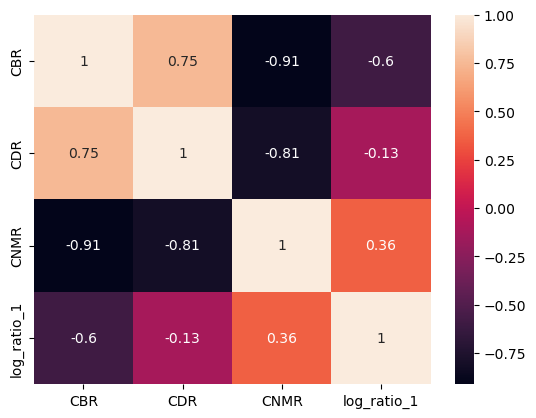

In [386]:
corr1 = full1.corr()
sns.heatmap(corr1, annot=True)

In [387]:
#X_train1 =X_train1[X_train1.columns.difference(['CDR'])]
#X_train1 =X_train1[X_train1.columns.difference(['CNMR'])]

<AxesSubplot:>

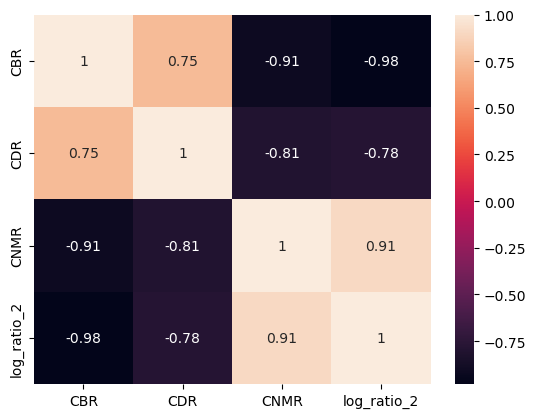

In [388]:
corr2 = full2.corr()
sns.heatmap(corr2, annot=True)

In [389]:
tss=TimeSeriesSplit(n_splits=3, test_size=11)

In [390]:
model_xgb = XGBRegressor(booster='gblinear')
model_xgb2 = XGBRegressor(booster='gblinear')

In [391]:
model_chained1=RegressorChain(model_xgb)
model_chained2=RegressorChain(model_xgb2)

In [392]:


# Define the search space
param_grid = { 
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "base_estimator__reg_alpha": [0, 0.5, 0.7,1,2,5,10],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "base_estimator__reg_lambda": [0, 0.5, 0.7,1,2, 5,10],

    } 

In [393]:

gsearch = GridSearchCV(estimator=model_chained1, cv=tss,
                        param_grid=param_grid)
gsearch2 = GridSearchCV(estimator=model_chained2, cv=tss,
                        param_grid=param_grid) 
            

In [394]:
gsearch.fit(X_train1, y_train1)
gsearch2.fit(X_train1, y_train2)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=11),
             estimator=RegressorChain(base_estimator=XGBRegressor(base_score=None,
                                                                  booster='gblinear',
                                                                  colsample_bylevel=None,
                                                                  colsample_bynode=None,
                                                                  colsample_bytree=None,
                                                                  enable_categorical=False,
                                                                  gamma=None,
                                                                  gpu_id=None,
                                                                  importance_type=None,
                                                                  interaction_constraints=None,
                                           

In [395]:
print(gsearch.best_params_)
print(gsearch2.best_params_) 

{'base_estimator__reg_alpha': 0.7, 'base_estimator__reg_lambda': 0}
{'base_estimator__reg_alpha': 0, 'base_estimator__reg_lambda': 2}


In [396]:
test1_att=test_att[test_att.columns.difference(['CDR'])]
#test1_att=test1_att[test1_att.columns.difference(['CNMR'])]


In [397]:
model_xgb = XGBRegressor(booster='gblinear',reg_alpha=0.7)
model_xgb2 = XGBRegressor(booster='gblinear')

In [398]:
model_chained1=RegressorChain(model_xgb)
model_chained2=RegressorChain(model_xgb2)

In [399]:
model_chained1.fit(X_train1, y_train1)
model_chained2.fit(X_train1, y_train2)

RegressorChain(base_estimator=XGBRegressor(base_score=None, booster='gblinear',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=Non

In [400]:
df_1=gsearch.predict(test_att)
df_2=gsearch2.predict(test_att)

In [401]:
test_data= pd.DataFrame(pd.read_csv(
    r"C:\Users\User\Projects\FYP_5\age_structure_data\df_test.csv"))
test_data['Year'] = pd.to_datetime(test_data['Year'])
test_data = test_data.set_index("Year")

In [402]:
def SLR_inv(arr_1,arr_2):
    log_ratio_1 = pd.DataFrame(arr_1,columns=['log_ratio_1'])
    log_ratio_2 = pd.DataFrame(arr_2,columns=['log_ratio_2'])
    e2_arr=[]
    y2_arr=[]
    k2_arr=[]
    for i in range(len(arr_1)):
        A = log_ratio_1._get_value(i,0,takeable = True)
        B = log_ratio_2._get_value(i,0,takeable = True)
        e2_arr.append(1)
        y2_arr.append(1/(10**A))
        k2_arr.append(1/(10**B))
    e_prepro = pd.DataFrame(e2_arr, columns=['e_prepro'])
    y_prepro = pd.DataFrame(y2_arr, columns=['y_prepro'])
    k_prepro = pd.DataFrame(k2_arr, columns=['k_prepro'])
    prepro = pd.concat([e_prepro, y_prepro,k_prepro],axis=1)
    data_proportion = closure(prepro)
    return data_proportion

In [403]:
data_proportion=SLR_inv(df_1,df_2)

In [404]:
def set_col(df):
    df = pd.DataFrame(df, columns=[
    'elder', 'youth', 'kid'])
    df['Year'] = df.index + 2010
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df = df.set_index("Year")
    return df

In [405]:
proportion = set_col(data_proportion)

In [406]:
actual_data=SLR_inv(SLR_1,SLR_2)
actual_data=pd.DataFrame(actual_data)
actual_data.columns=proportion.columns
actual_data['Year'] = actual_data.index + 1964
actual_data['Year'] = pd.to_datetime(actual_data['Year'], format='%Y')
actual_data = actual_data.set_index("Year")

In [407]:
proportion

,elder,youth,kid
Year,,,
2010-01-01,0.043133,0.670236,0.286630
2011-01-01,0.043102,0.669753,0.287145
2012-01-01,0.043070,0.669257,0.287672
2013-01-01,0.043034,0.668693,0.288273
2014-01-01,0.042997,0.668121,0.288882
2015-01-01,0.042963,0.667589,0.289448
2016-01-01,0.042930,0.667076,0.289994
2017-01-01,0.042896,0.666549,0.290555
2018-01-01,0.042861,0.666010,0.291129


In [408]:
rmse_final = sqrt(mean_squared_error(proportion, test_data))
rmse_final

0.029324652393494934

<function matplotlib.pyplot.show(close=None, block=None)>

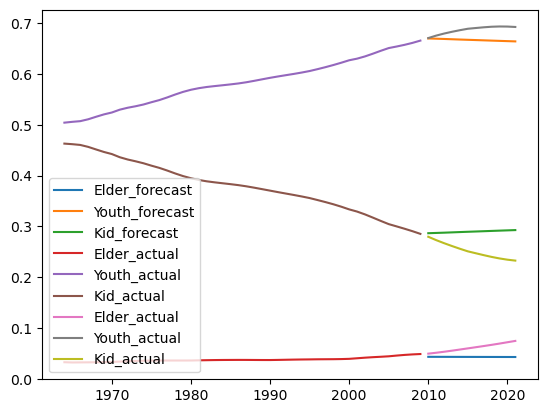

In [409]:
plt.plot(proportion['elder'],label="Elder_forecast")
plt.plot(proportion['youth'],label="Youth_forecast")
plt.plot(proportion['kid'],label="Kid_forecast")
plt.plot(actual_data['elder'],label="Elder_actual")
plt.plot(actual_data['youth'],label="Youth_actual")
plt.plot(actual_data['kid'],label="Kid_actual")

plt.plot(test_data['elder'],label="Elder_actual")
plt.plot(test_data['youth'],label="Youth_actual")
plt.plot(test_data['kid'],label="Kid_actual")

plt.legend(loc='best')
plt.show